# TP 3.1 : Test de Student

Nous nous intéressons ici au test de Student de comparaison des moyennes sur 2 échantillons indépendants simulés selon des lois normales de même variance $\sigma^2 > 0$,
\begin{equation*}
X_1,\dots,X_p \sim \mathcal{N}(m_X,\sigma^2) \quad \text{et} \quad Y_1,\dots,Y_q \sim \mathcal{N}(m_Y,\sigma^2).
\end{equation*}
Pour expérimenter, nous prendrons $p=q=10$, $m_X=m_Y=0$ et $\sigma^2=1$.

In [1]:
# Génération des échantillons
x <- rnorm(10)
y <- rnorm(10)

Le test bilatéral de comparaison des moyennes sur ces 2 échantillons se fait en utilisant la fonction `t.test()` avec l'option `var.equal=TRUE`.

In [2]:
# Test bilatéral de comparaison des moyennes
resultat_test <- t.test(x, y, var.equal=TRUE)

# L'objet obtenu contient beaucoup d'informations
resultat_test


	Two Sample t-test

data:  x and y
t = 0.89748, df = 18, p-value = 0.3813
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4115138  1.0252924
sample estimates:
  mean of x   mean of y 
-0.06865696 -0.37554630 




    Utilisez la cellule suivante pour répondre aux questions :
        <li>Donner l'hypothèse nulle $H_0$ et l'hypothèse alternative $H_1$ de ce test.</li>
        <li>Pourquoi faut-il supposer que les deux échantillons aient la même variance ? En particulier, quelle est la loi de la variable
            \begin{equation*}
                (p+q-2)\frac{\tilde{\sigma}^2_{p,q}}{\sigma^2} \quad \text{où} \quad \tilde{\sigma}^2_{p,q} = \frac{1}{p+q-2}\sum_{k=1}^p\left( X_k - \bar{X}_p \right)^2 + \frac{1}{p+q-2}\sum_{k=1}^q\left( Y_k - \bar{Y}_q \right)^2\ ?
            \end{equation*}
        </li>
        <li>En déduire la loi de la statistique de test
            \begin{equation*}
                T = \sqrt{\frac{pq}{p+q}} \times \frac{\bar{X}_p - \bar{Y}_q}{\sqrt{\tilde{\sigma}^2_{p,q}}}.
            \end{equation*}
        </li>
        <li>Vérifier le calcul de la statistique de test donné dans <code>resultat_test</code>.</li>
        <li>Quelle est la p-valeur du test <code>resultat_test</code> ? Pour un niveau de 95%, doit-on accepter ou rejeter $H_0$ ? Est-ce cohérent avec notre simulation initiale ?</li>
        <li>Recalculer cette p-valeur à partir d'une loi de Student à 18 degrés de liberté.</li>


À FAIRE
L'hypothèse $H_0$ est que la différence absolue des deux moyennes soit égale à zéro, soit que les deux moyennes soient égales.
L'hypothèse alternative est que les deux moyennes ne sont pas égales. 

Afin d'appliquer le théorème, on a besoin de cette hypothèse. $(p+q-2)\frac{\tilde{\sigma}_{p,q}^2}{\sigma^2}$ suit la loi de $\chi(p+q-2)$

La statistique de test suit la loi de Student suivant $\cal{T}(p+q-2)$

 Calcul de la statistique du test : 

Nous le ferons plus tard. Retenons le raisonnement suivant. 
1 - Nous démontrons que la statistique de test (variable aléatoire), sous l'hypothèse H0, suit une loi de student
2 - Nous avons une réalisation de la statistique de test et souhaitons savoir si nous avons obtenu quelque chose de probable ou pas selon la loi de student.
3 - Si nous sommes sur une valeur très probable, nous pouvons accepter H0, si nous sommes sur des valeurs rarement prises par la loi de student, on rejette H0

Pour illustrer la notion de niveau d'un test, nous simulons 1000 paires d'échantillons de taille 10 comme ci-dessus et nous les stockons dans deux matrices `X` et `Y`.

In [7]:
X <- matrix(rnorm(1000*10), nrow=1000)
Y <- matrix(rnorm(1000*10), nrow=1000)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Effectuer un test de comparaison des moyennes pour chaque paire d'échantillons et stocker la p-valeur du résultat dans un vecteur <code>p_valeur</code> de taille 1000.</li>
        <li>Combien de p-valeurs inférieures à 0.05 obtenez-vous ? Combien devriez-vous théoriquement en obtenir en moyenne ?</li>
        <li>Repérer l'indice du test qui donne la plus petite p-valeur (il peut être utile d'utiliser la fonction <code>which.min()</code>). Pour un niveau de 95%, doit-on accepter ou rejeter $H_0$ pour ce test ?</li>
        <li>Représenter graphiquement les données correspondant à ce test :
            <ul>
                <li>afficher la densité de la loi normale centrée réduite entre -3 et 3 avec <code>plot(dnorm, -3, 3, type="l")</code>,</li>
                <li>afficher les deux échantillons avec deux couleurs différentes grâce à la fonction <code>rug()</code>,</li>
                <li>afficher les moyennes des deux échantillons (fonction <code>rug()</code>),</li>
                <li>ajouter une légende.</li>
            </ul>
            <center><img src="img/student.png"></center>
        </li>
    </ol>
</div>

In [13]:
# À FAIRE
p_valeur <- c()
for (i in 1:nrow(X)){
    p_valeur <- c(p_valeur, t.test(X[i, ], Y[i, ], var.equal = TRUE)$p.value)
}
a <- 0
for (i in p_valeur){
    if (i < 0.05){
        a <- a + 1 
    }
}

which.min(p_valeur)
print(p_valeur[694])

[1] 694

[1] 0.0002984035


On obtient 41 p-valeurs en dessous de 5%. On est censé en obtenir 50 en moyenne. On doit rejeter le test puisque la p-valeur est inférieur à 5%.

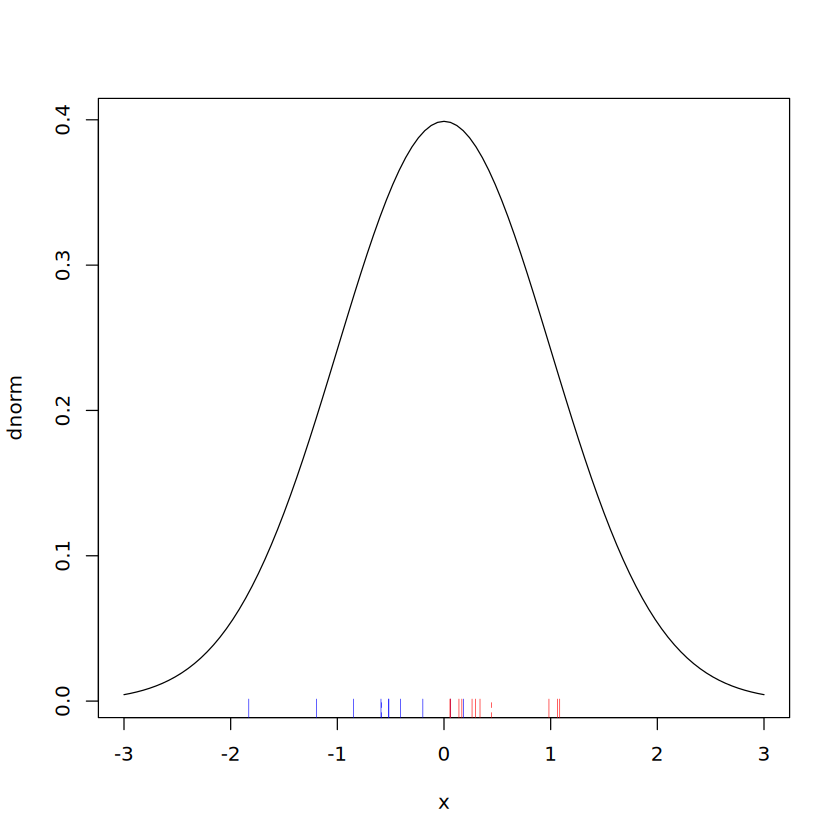

In [17]:
par(bg = "white")
plot(dnorm, -3, 3, type = "l")
rug(X[694,], col="blue")
rug(Y[694,], col="red")
rug(mean(X[694,]), col = "blue", lty = 2)
rug(mean(Y[694,]), col = "red", lty = 2)

